# 1. 문제 정의
## (Home Credit Default Risk)



은행 계좌가 없는 사람들에게 대출 서비스를 제공하기 위해 "Home Credit : 국제적인 비은행 금융 기관" 의 데이터를 이용한다. 고객이 대출금을 상환할 수 있을지 아니면 어려움을 겪을지를 예측해야 한다.

# 2. 데이터 수집하기

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# 3. 탐구 자료 분석
### 데이터 설명
* application_train/application_test : Home Credit의 각 대출 신청에 대한 정보.(0: 대출 상환, 1: 대출 미상환)

* bureau : 다른 금융 기관에서 고객의 이전 신용에 관한 데이터. 

* bureau_balance : 이전 신용에 대한 월별 데이터.

* previous_application : 

* POS_CASH_BALANCE : 고객의 이전 대출 월별 데이터.

* credit_card_balance : 고객의 이전 신용 카드로 받은 신용에 대한 월별 데이터.

* installments_payment : 이전 대출에 대한 지불내역.


In [23]:
app_train = pd.read_csv("/home/pirl/Downloads/application_train.csv")
app_test = pd.read_csv("/home/pirl/Downloads/application_test.csv")

In [5]:
app_train.shape

(307511, 122)

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


training data는 307511개의 관측값과 122개의 특징들을 가지고 있다.

여기서, TARGET은 우리가 예측하고 싶은 label 이다.

### TARGET 열의 분포 확인

In [7]:
#먼저, 각 범주(0:대출 상환, 1:대출 미상환)에 대한 count값을 구할 수 있다.
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

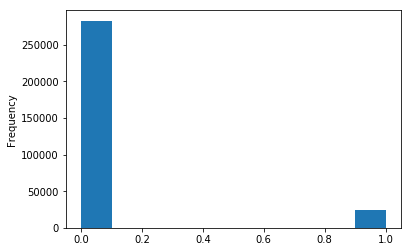

In [9]:
app_train['TARGET'].astype(int).plot.hist() #astype 자료형 변환

상환되지 않은 대출보다 제 시간에 상환된 대출이 더 많음을 알 수 있다.


### 결측치의 계산
#### 그다음, 각 열별로 결측치의 수와 비율에 대해 알아보자.

In [11]:

def missing_values_table(df):
        # 결측치의 개수
        mis_val = df.isnull().sum()
        
        # 결측치의 비율
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # 결과값을 가지고 table 만들기 : concat(병합)
        mis_val_table1 = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # 열이름 바꾸기
        mis_val_table = mis_val_table1.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # 결측치의 비율로 내림차순 정렬
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # 요약 정보 출력
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
        
        # 결측치에 대한 정보를 데이터프레임으로 출력
        return mis_val_table
    

In [18]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### 열의 타입

In [14]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [21]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 범주형 변수의 인코딩
#### one hot encoding  

In [24]:
# sklearn

# label encoder 객체 재등록
le = LabelEncoder()
le_count = 0

# 열 반복
for col in app_train:
    if app_train[col].dtype == 'object':
        
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [25]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


#### 데이터 정렬